# This notebook do the regression task using SVM and lightGBM models  
Authored by Wen Xie

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error as mse

In [2]:
mdata = pd.read_csv('mdata_im.csv')

In [3]:
def lgbmodel(params,X_train,lgb_train,lgb_val,early_stop):
    evals_result = {}  # to record eval results for plotting
    gbm = lgb.train(params,
                    train_set = lgb_train,
                    num_boost_round=2000,
                    valid_sets = [lgb_train,lgb_val],
                    feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                    early_stopping_rounds = early_stop,
                    evals_result=evals_result,
                    verbose_eval=20)
    return gbm, evals_result

## Metadata

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR

In [5]:
enc = OneHotEncoder(handle_unknown='ignore')

In [7]:
X_YR = enc.fit_transform([[i] for i in mdata['Year']]).toarray()
y_YR = mdata['imdbRating']  #S:1,F:0
X_train_YR, X_test_YR, y_train_YR, y_test_YR = train_test_split(X_YR, y_YR, test_size=0.2, random_state=42)
X_train_YR, X_val_YR, y_train_YR, y_val_YR = train_test_split(X_train_YR, y_train_YR, test_size=0.2, random_state=42)
print('X train shape: ', X_train_YR.shape)
print('y train shape: ', y_train_YR.shape)
print('X test shape: ', X_test_YR.shape)
print('y test shape: ', y_test_YR.shape)
print('X val shape: ', X_val_YR.shape)
print('y val shape: ', y_val_YR.shape)

X train shape:  (9724, 102)
y train shape:  (9724,)
X test shape:  (3039, 102)
y test shape:  (3039,)
X val shape:  (2432, 102)
y val shape:  (2432,)


In [8]:
lgb_train_YR = lgb.Dataset(X_train_YR, y_train_YR,free_raw_data=True)
lgb_val_YR = lgb.Dataset(X_val_YR, y_val_YR, reference=lgb_train_YR,free_raw_data=True)

In [9]:
#params = {'num_leaves': 5,'metric': ['cross_entropy'],'verbose': -1}
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric':'mse',
          'num_leaves': 5,
          'learning_rate':0.01,
          'verbose': -1}
gbm_YR,_ = lgbmodel(params=params,X_train=X_train_YR,lgb_train=lgb_train_YR,lgb_val=lgb_val_YR,early_stop=20)

Training until validation scores don't improve for 20 rounds
[20]	training's l2: 1.40936	valid_1's l2: 1.38431
[40]	training's l2: 1.39781	valid_1's l2: 1.37702
[60]	training's l2: 1.38915	valid_1's l2: 1.37189
[80]	training's l2: 1.38248	valid_1's l2: 1.36827
[100]	training's l2: 1.37696	valid_1's l2: 1.36503
[120]	training's l2: 1.37203	valid_1's l2: 1.36185
[140]	training's l2: 1.36754	valid_1's l2: 1.3591
[160]	training's l2: 1.36349	valid_1's l2: 1.35641
[180]	training's l2: 1.35973	valid_1's l2: 1.3537
[200]	training's l2: 1.35624	valid_1's l2: 1.35131
[220]	training's l2: 1.35292	valid_1's l2: 1.34897
[240]	training's l2: 1.34981	valid_1's l2: 1.34687
[260]	training's l2: 1.3469	valid_1's l2: 1.34485
[280]	training's l2: 1.34415	valid_1's l2: 1.34301
[300]	training's l2: 1.34157	valid_1's l2: 1.34125
[320]	training's l2: 1.33911	valid_1's l2: 1.33959
[340]	training's l2: 1.33677	valid_1's l2: 1.33797
[360]	training's l2: 1.3345	valid_1's l2: 1.33651
[380]	training's l2: 1.33237	

In [11]:
y_pred = gbm_YR.predict(X_test_YR)
mse(y_pred,y_test_YR)

1.2917909440884647

### svm

In [10]:
svm_YR = SVR(gamma='scale')
svm_YR.fit(np.r_[X_train_YR,X_val_YR],np.r_[y_train_YR,y_val_YR])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
y_pred = svm_YR.predict(X_test_YR)
mse(y_pred,y_test_YR)

1.298637693439808

### runtime

In [13]:
import re

In [14]:
mdata['Runtime'].fillna('0 missing',inplace=True)
mdata['Runtime']=mdata['Runtime'].apply(lambda x: ''.join(re.findall('\d',x)))
mdata['Runtime'].fillna(mdata['Runtime'].mean(),inplace=True)

In [15]:
X_RT = enc.fit_transform([[i] for i in mdata['Runtime']]).toarray()
y_RT = mdata['imdbRating']  #S:1,F:0
X_train_RT, X_test_RT, y_train_RT, y_test_RT= train_test_split(X_RT, y_RT, test_size=0.2, random_state=42)
X_train_RT, X_val_RT, y_train_RT, y_val_RT = train_test_split(X_train_RT, y_train_RT, test_size=0.2, random_state=42)
print('X train shape: ', X_train_RT.shape)
print('y train shape: ', y_train_RT.shape)
print('X test shape: ', X_test_RT.shape)
print('y test shape: ', y_test_RT.shape)
print('X val shape: ', X_val_RT.shape)
print('y val shape: ', y_val_RT.shape)

X train shape:  (9724, 222)
y train shape:  (9724,)
X test shape:  (3039, 222)
y test shape:  (3039,)
X val shape:  (2432, 222)
y val shape:  (2432,)


In [17]:
lgb_train_RT = lgb.Dataset(X_train_RT, y_train_RT,free_raw_data=True)
lgb_val_RT = lgb.Dataset(X_val_RT, y_val_RT, reference=lgb_train_RT,free_raw_data=True)
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric':'mse',
          'num_leaves': 5,
          'learning_rate':0.01,
          'verbose': -1}
gbm_RT,_ = lgbmodel(params=params,X_train=X_train_RT,lgb_train=lgb_train_RT,lgb_val=lgb_val_RT,early_stop=20)

Training until validation scores don't improve for 20 rounds
[20]	training's l2: 1.41105	valid_1's l2: 1.3808
[40]	training's l2: 1.40033	valid_1's l2: 1.37154
[60]	training's l2: 1.39165	valid_1's l2: 1.36399
[80]	training's l2: 1.38424	valid_1's l2: 1.35744
[100]	training's l2: 1.37762	valid_1's l2: 1.35141
[120]	training's l2: 1.37167	valid_1's l2: 1.34594
[140]	training's l2: 1.36631	valid_1's l2: 1.34107
[160]	training's l2: 1.36144	valid_1's l2: 1.33666
[180]	training's l2: 1.35696	valid_1's l2: 1.33243
[200]	training's l2: 1.35281	valid_1's l2: 1.32842
[220]	training's l2: 1.34896	valid_1's l2: 1.32466
[240]	training's l2: 1.34535	valid_1's l2: 1.32122
[260]	training's l2: 1.34197	valid_1's l2: 1.31777
[280]	training's l2: 1.33881	valid_1's l2: 1.31479
[300]	training's l2: 1.33583	valid_1's l2: 1.31186
[320]	training's l2: 1.33301	valid_1's l2: 1.30873
[340]	training's l2: 1.33034	valid_1's l2: 1.30608
[360]	training's l2: 1.32782	valid_1's l2: 1.30346
[380]	training's l2: 1.325

In [18]:
y_pred = gbm_RT.predict(X_test_RT)
mse(y_pred,y_test_RT)

1.2900013926216074

### svm

In [21]:
svm_RT = SVR(gamma='scale')
svm_RT.fit(np.r_[X_train_RT,X_val_RT],np.r_[y_train_RT,y_val_RT])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred = svm_RT.predict(X_test_RT)
mse(y_pred,y_test_RT)

1.3066676538078021

### Genre

In [ ]:
mdata['Genre'].fillna('missing',inplace=True)
X_GE = enc.fit_transform([[i] for i in mdata['Genre']]).toarray()
y_GE = mdata['imdbRating']  #S:1,F:0
X_train_GE, X_test_GE, y_train_GE, y_test_GE= train_test_split(X_GE, y_GE, test_size=0.2, random_state=42)
X_train_GE, X_val_GE, y_train_GE, y_val_GE = train_test_split(X_train_GE, y_train_GE, test_size=0.2, random_state=42)
print('X train shape: ', X_train_GE.shape)
print('y train shape: ', y_train_GE.shape)
print('X test shape: ', X_test_GE.shape)
print('y test shape: ', y_test_GE.shape)
print('X val shape: ', X_val_GE.shape)
print('y val shape: ', y_val_GE.shape)

lgb_train_GE = lgb.Dataset(X_train_GE, y_train_GE,free_raw_data=True)
lgb_val_GE = lgb.Dataset(X_val_GE, y_val_GE, reference=lgb_train_GE,free_raw_data=True)

params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric':'mse',
          'num_leaves': 5,
          'learning_rate':0.01,
          'verbose': -1}

gbm_GE,_ = lgbmodel(params=params,X_train=X_train_GE,lgb_train=lgb_train_GE,lgb_val=lgb_val_GE,early_stop=20)

In [ ]:
y_pred = gbm_GE.predict(X_test_GE)
mse(y_pred,y_test_GE)

### svm

In [ ]:
svm_GE = SVR(gamma='scale')
svm_GE.fit(np.r_[X_train_GE,X_val_GE],np.r_[y_train_GE,y_val_GE])
y_pred = svm_GE.predict(X_test_GE)
mse(y_pred,y_test_GE)

# 1, NRC-word emotion

In [28]:
emolex = pd.read_csv('fea_emolex.csv')
train_NRC = pd.merge(emolex,mdata,how='right',left_on='ID',right_on='imdbID')

In [5]:
X_NRC = train_NRC.iloc[:,2:52]
y_NRC = train_NRC['imdbRating'] #S:1,F:0
X_train_NRC, X_test_NRC, y_train_NRC, y_test_NRC = train_test_split(X_NRC, y_NRC, test_size=0.2, random_state=42)
X_train_NRC, X_val_NRC, y_train_NRC, y_val_NRC = train_test_split(X_train_NRC, y_train_NRC, test_size=0.2, random_state=42)
print('X train shape: ', X_train_NRC.shape)
print('y train shape: ', y_train_NRC.shape)
print('X test shape: ', X_test_NRC.shape)
print('y test shape: ', y_test_NRC.shape)
print('X val shape: ', X_val_NRC.shape)
print('y val shape: ', y_val_NRC.shape)

X train shape:  (9724, 50)
y train shape:  (9724,)
X test shape:  (3039, 50)
y test shape:  (3039,)
X val shape:  (2432, 50)
y val shape:  (2432,)


### Create Dataset object for LightGBM

In [6]:
lgb_train_NRC = lgb.Dataset(X_train_NRC, y_train_NRC,free_raw_data=True)
lgb_val_NRC = lgb.Dataset(X_val_NRC, y_val_NRC, reference=lgb_train_NRC,free_raw_data=True)

In [90]:
#params = {'num_leaves': 5,'metric': ['cross_entropy'],'verbose': -1}
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric':'mse',
          'num_leaves': 5,
          'learning_rate':0.01,
          'verbose': -1}

In [91]:
gbm_NRC,_ = lgbmodel(params=params,X_train=X_train_NRC,lgb_train=lgb_train_NRC,lgb_val=lgb_val_NRC,early_stop=20)

Training until validation scores don't improve for 20 rounds
[20]	training's l2: 1.38273	valid_1's l2: 1.33173
[40]	training's l2: 1.36078	valid_1's l2: 1.31476
[60]	training's l2: 1.34465	valid_1's l2: 1.30332
[80]	training's l2: 1.33206	valid_1's l2: 1.29546
[100]	training's l2: 1.32212	valid_1's l2: 1.28954
[120]	training's l2: 1.31388	valid_1's l2: 1.28508
[140]	training's l2: 1.30699	valid_1's l2: 1.28158
[160]	training's l2: 1.30112	valid_1's l2: 1.27838
[180]	training's l2: 1.29586	valid_1's l2: 1.27594
[200]	training's l2: 1.2912	valid_1's l2: 1.27382
[220]	training's l2: 1.2869	valid_1's l2: 1.27233
[240]	training's l2: 1.28305	valid_1's l2: 1.27098
[260]	training's l2: 1.27932	valid_1's l2: 1.26999
[280]	training's l2: 1.27558	valid_1's l2: 1.26862
[300]	training's l2: 1.27192	valid_1's l2: 1.26772
[320]	training's l2: 1.26849	valid_1's l2: 1.26682
[340]	training's l2: 1.26518	valid_1's l2: 1.2661
[360]	training's l2: 1.26207	valid_1's l2: 1.2654
[380]	training's l2: 1.25908	

### Prediction

In [92]:
y_pred = gbm_NRC.predict(X_test_NRC)
mse(y_pred,y_test_NRC)

1.375723708403093

In [93]:
y_pred[0:10]

array([6.36356543, 5.90290245, 5.88992951, 6.77997673, 6.79348803,
       6.74950619, 6.38960489, 6.51117542, 6.28656417, 6.36763265])

### SVM

In [ ]:
from sklearn.svm import SVR

In [74]:
svm_NRC = SVR(gamma='scale')
svm_NRC.fit(np.r_[X_train_NRC,X_val_NRC],np.r_[y_train_NRC,y_val_NRC])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
y_pred = svm_NRC.predict(X_test_NRC)
mse(y_pred,y_test_NRC)

1.3828222562790087

In [78]:
y_pred[0:10] 

array([6.02230913, 6.36170911, 6.03539783, 7.03310448, 6.72120041,
       6.97329876, 6.45819268, 6.90620396, 6.36621494, 6.51767049])

In [58]:
y_test_NRC[0:10]

8953     5.8
8060     4.9
11721    7.5
14609    7.6
5049     6.4
7163     6.3
5729     4.6
8845     8.3
13455    4.6
4010     6.4
Name: imdbRating, dtype: float64

# 2, Poster saliency

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

In [30]:
X_POS = []
for i in mdata['imdbID'].values:
    im = np.array(Image.open('../imsaliency/'+i+'.jpg'))
    X_POS.append(im)

#reshape
X_POS = np.array(X_POS).reshape(len(mdata),-1)

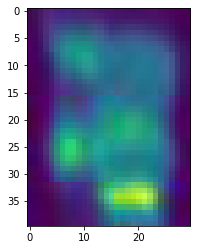

In [16]:
plt.imshow(X_POS[0].reshape(40,30,3))
plt.show()

In [ ]:
'''
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_POS_em = PCA(n_components=1000).fit_transform(X_POS)
'''

In [17]:
y_POS = mdata['imdbRating']  #S:1,F:0
X_train_POS, X_test_POS, y_train_POS, y_test_POS = train_test_split(X_POS, y_POS, test_size=0.2, random_state=42)
X_train_POS, X_val_POS, y_train_POS, y_val_POS = train_test_split(X_train_POS, y_train_POS, test_size=0.2, random_state=42)
print('X train shape: ', X_train_POS.shape)
print('y train shape: ', y_train_POS.shape)
print('X test shape: ', X_test_POS.shape)
print('y test shape: ', y_test_POS.shape)
print('X val shape: ', X_val_POS.shape)
print('y val shape: ', y_val_POS.shape)

X train shape:  (9724, 3600)
y train shape:  (9724,)
X test shape:  (3039, 3600)
y test shape:  (3039,)
X val shape:  (2432, 3600)
y val shape:  (2432,)


In [18]:
lgb_train_POS = lgb.Dataset(X_train_POS, y_train_POS)
lgb_val_POS = lgb.Dataset(X_val_POS, y_val_POS, reference=lgb_train_POS)

In [19]:
#params = {'num_leaves': 5,'metric': ['cross_entropy'],'verbose': -1}
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric':'mse',
          'num_leaves': 10,
          'learning_rate':0.1,
          'verbose': -1}

In [20]:
gbm_POS,_ = lgbmodel(params=params,X_train=X_train_POS,lgb_train=lgb_train_POS,lgb_val=lgb_val_POS,early_stop=20)

Training until validation scores don't improve for 20 rounds
[20]	training's l2: 1.29788	valid_1's l2: 1.37391
Early stopping, best iteration is:
[12]	training's l2: 1.33848	valid_1's l2: 1.37185


### prediction

In [27]:
y_pred = gbm_POS.predict(X_test_POS)
mse(y_pred,y_test_POS)

1.3956752720737398

### SVM

In [94]:
svm_POS = SVR(gamma='scale')
svm_POS.fit(np.r_[X_train_POS,X_val_POS],np.r_[y_train_POS,y_val_POS])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [95]:
y_pred = svm_POS.predict(X_test_POS)
mse(y_pred,y_test_POS)

1.4200270960895982

In [96]:
y_pred[0:10]

array([6.29274937, 6.35823482, 6.54456084, 6.19548886, 6.14773271,
       6.36763877, 6.32742937, 6.02236875, 6.21844059, 6.43026993])

In [97]:
y_test_POS[0:10]

8953     7.7
8060     5.7
11721    4.0
14609    5.3
5049     7.0
7163     6.4
5729     6.6
8845     7.2
13455    3.7
4010     4.7
Name: imdbRating, dtype: float64

# 3, Bert sentence embedding

In [31]:
sents_em = np.loadtxt('bert-sents-em15195_200.txt')

In [29]:
y_SEM = mdata['imdbRating']  #S:1,F:0
X_train_SEM, X_test_SEM, y_train_SEM, y_test_SEM = train_test_split(sents_em, y_SEM, test_size=0.2, random_state=42)
X_train_SEM, X_val_SEM, y_train_SEM, y_val_SEM = train_test_split(X_train_SEM, y_train_SEM, test_size=0.2, random_state=42)
print('X train shape: ', X_train_SEM.shape)
print('y train shape: ', y_train_SEM.shape)
print('X test shape: ', X_test_SEM.shape)
print('y test shape: ', y_test_SEM.shape)
print('X val shape: ', X_val_SEM.shape)
print('y val shape: ', y_val_SEM.shape)

X train shape:  (9724, 200)
y train shape:  (9724,)
X test shape:  (3039, 200)
y test shape:  (3039,)
X val shape:  (2432, 200)
y val shape:  (2432,)


In [30]:
lgb_train_SEM = lgb.Dataset(X_train_SEM, y_train_SEM,free_raw_data=False)
lgb_val_SEM = lgb.Dataset(X_val_SEM, y_val_SEM, reference=lgb_train_SEM,free_raw_data=False)

In [31]:
#params = {'num_leaves': 5,'metric': ['cross_entropy'],'verbose': -1}
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric':'mse',
          'num_leaves': 10,
          'learning_rate':0.1,
          'verbose': -1}

In [32]:
gbm_SEM,_ = lgbmodel(params=params,X_train=X_train_SEM,lgb_train=lgb_train_SEM,lgb_val=lgb_val_SEM,early_stop=20)

Training until validation scores don't improve for 20 rounds
[20]	training's l2: 1.31364	valid_1's l2: 1.35878
[40]	training's l2: 1.23137	valid_1's l2: 1.34258
[60]	training's l2: 1.16506	valid_1's l2: 1.33369
[80]	training's l2: 1.10409	valid_1's l2: 1.33471
[100]	training's l2: 1.05192	valid_1's l2: 1.33328
[120]	training's l2: 1.00327	valid_1's l2: 1.33128
[140]	training's l2: 0.958004	valid_1's l2: 1.33083
Early stopping, best iteration is:
[129]	training's l2: 0.981614	valid_1's l2: 1.3285


### prediction

In [34]:
y_pred = gbm_SEM.predict(X_test_SEM)
mse(y_pred,y_test_SEM)

1.3513945427209193

### SVM

In [98]:
svm_SEM = SVR(gamma='scale')

In [99]:
svm_SEM.fit(np.r_[X_train_SEM,X_val_SEM],np.r_[y_train_SEM,y_val_SEM])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [100]:
y_pred = svm_SEM.predict(X_test_SEM)
mse(y_pred,y_test_SEM)

1.3466201083682945

## 4, Writing style

In [32]:
ws = pd.read_csv('fea_writing.csv')

In [33]:
train_ws = pd.merge(ws,mdata,how='right',left_on='imdbID',right_on='imdbID')

In [41]:
X_WS = train_ws.iloc[:,0:10]
y_WS  = train_ws['imdbRating']  #S:1,F:0
X_train_WS , X_test_WS , y_train_WS , y_test_WS  = train_test_split(X_WS , y_WS , test_size=0.2, random_state=42)
X_train_WS , X_val_WS , y_train_WS , y_val_WS  = train_test_split(X_train_WS , y_train_WS , test_size=0.2, random_state=42)
print('X train shape: ', X_train_WS.shape)
print('y train shape: ', y_train_WS.shape)
print('X test shape: ', X_test_WS.shape)
print('y test shape: ', y_test_WS.shape)
print('X val shape: ', X_val_WS.shape)
print('y val shape: ', y_val_WS.shape)

X train shape:  (9724, 10)
y train shape:  (9724,)
X test shape:  (3039, 10)
y test shape:  (3039,)
X val shape:  (2432, 10)
y val shape:  (2432,)


In [42]:
lgb_train_WS = lgb.Dataset(X_train_WS, y_train_WS,free_raw_data=True)
lgb_val_WS= lgb.Dataset(X_val_WS, y_val_WS, reference=lgb_train_WS,free_raw_data=True)

In [43]:
#params = {'num_leaves': 5,'metric': ['cross_entropy'],'verbose': -1}
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric':'mse',
          'num_leaves': 10,
          'learning_rate':0.1,
          'verbose': -1}

In [44]:
gbm_WS,_ = lgbmodel(params=params,X_train=X_train_WS,lgb_train=lgb_train_WS,lgb_val=lgb_val_WS,early_stop=20)

Training until validation scores don't improve for 20 rounds
[20]	training's l2: 1.39159	valid_1's l2: 1.40292
Early stopping, best iteration is:
[1]	training's l2: 1.42305	valid_1's l2: 1.3959


### prediction

In [45]:
y_pred = gbm_WS.predict(X_test_WS) 
mse(y_pred,y_test_WS)

1.4191492601908142

### svm

In [101]:
svm_WS = SVR(gamma='scale')

In [102]:
svm_WS.fit(np.r_[X_train_WS,X_val_WS],np.r_[y_train_WS,y_val_WS])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [103]:
y_pred = svm_WS.predict(X_test_WS)
mse(y_pred,y_test_WS)

1.4456755391036071

In [104]:
y_pred[0:4]

array([6.38132181, 6.35349785, 6.38633667, 6.38961999])

## All feature together

In [34]:
X = np.c_[train_NRC.iloc[:,2:52],X_POS,sents_em,train_ws.iloc[:,0:10],X_YR,X_RT]

In [35]:
y  = mdata['imdbRating']  #S:1,F:0
X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
X_train , X_val , y_train , y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)
print('X val shape: ', X_val.shape)
print('y val shape: ', y_val.shape)

X train shape:  (9724, 4184)
y train shape:  (9724,)
X test shape:  (3039, 4184)
y test shape:  (3039,)
X val shape:  (2432, 4184)
y val shape:  (2432,)


In [107]:
lgb_train = lgb.Dataset(X_train, y_train,free_raw_data=False)
lgb_val= lgb.Dataset(X_val, y_val, reference=lgb_train,free_raw_data=False)

In [108]:
#params = {'num_leaves': 5,'metric': ['cross_entropy'],'verbose': -1}
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric':'mse',
          'num_leaves': 10,
          'learning_rate':0.1,
          'verbose': -1}

In [109]:
gbm,_ = lgbmodel(params=params,X_train=X_train,lgb_train=lgb_train,lgb_val=lgb_val,early_stop=20)

Training until validation scores don't improve for 20 rounds
[20]	training's l2: 1.28016	valid_1's l2: 1.35092
[40]	training's l2: 1.18144	valid_1's l2: 1.34146
[60]	training's l2: 1.09969	valid_1's l2: 1.33954
[80]	training's l2: 1.02827	valid_1's l2: 1.33285
[100]	training's l2: 0.964873	valid_1's l2: 1.33423
Early stopping, best iteration is:
[88]	training's l2: 1.00101	valid_1's l2: 1.33207


### prediction

In [110]:
y_pred = gbm.predict(X_test)
mse(y_pred,y_test)

1.3562552559196197

### svm

In [111]:
svm = SVR(gamma='scale')
svm.fit(np.r_[X_train,X_val],np.r_[y_train,y_val])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [112]:
y_pred = svm.predict(X_test)
mse(y_pred,y_test)

1.416629125173924

## Finetuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,10,1000],  
              'gamma': [1, 1e-5,1e-10], 
              'kernel': ['rbf']}  
grid = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=3, refit=True, verbose=3) 
# fitting the model for grid search 
grid.fit(np.r_[X_train,X_val], np.r_[y_train,y_val]) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 6.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.7min remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 6.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 6.6min
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=1e-05, kernel=rbf, total= 6.5min
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=1e-05, kernel=rbf, total= 6.5min
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=1e-05, kernel=rbf, total= 6.8min
[CV] C=0.1, gamma=1e-10, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=1e-10, kernel=rbf, total= 6.9min
[CV] C=0.1, gamma=1e-10, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=1e-10, kernel=rbf, total= 7.3min
[CV] C=0.1, gamma=1e-10, kernel=rbf ..................................
[CV] .

### Plot metrics recorded during training

In [ ]:
try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False
import matplotlib.pyplot as plt

In [ ]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

In [ ]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'])
else:
    render_metric(params['metric'][0])

### Plot feature importances

In [ ]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

In [ ]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

### Plot split value histogram

In [ ]:
def render_histogram(feature):
    ax = lgb.plot_split_value_histogram(gbm, feature=feature,
                                        bins='auto', figsize=(10, 5))
    plt.show()

In [ ]:
if INTERACTIVE:
    # create widget for interactive split value histogram
    interact(render_histogram,
             feature=gbm.feature_name())
else:
    render_histogram(feature='f26')